# Introduction

# Data Preparation

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

%matplotlib inline
sns.set_style('dark')

## Importing & Formatting the Data

In [2]:
index_names = ['unit', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [3]:
df_train = pd.read_csv(r'C:\Data Science\Datasets\NASA Asset Degradation Modelling\train_FD001.txt', sep='\s+', \
                       header=None, index_col=False, names=col_names)
df_test = pd.read_csv(r'C:\Data Science\Datasets\NASA Asset Degradation Modelling\test_FD001.txt', sep='\s+', \
                      header=None, index_col=False, names=col_names)
y_test = pd.read_csv(r'C:\Data Science\Datasets\NASA Asset Degradation Modelling\RUL_FD001.txt', sep='\s+', \
                     header=None, index_col=False, names=['RUL'])

In [4]:
train = df_train.copy()
test = df_test.copy()

In [5]:
print('Shape of training set: {}'.format(train.shape))
print('Shape of test set: {}'.format(test.shape))
print('Shape of final values: {}'.format(y_test.shape))

Shape of training set: (20631, 26)
Shape of test set: (13096, 26)
Shape of final values: (100, 1)


In [6]:
train.head()

,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
test.head()

,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


## Basic Observations

In [8]:
train.isnull().sum()

unit         0
cycle        0
setting_1    0
setting_2    0
setting_3    0
s_1          0
s_2          0
s_3          0
s_4          0
s_5          0
s_6          0
s_7          0
s_8          0
s_9          0
s_10         0
s_11         0
s_12         0
s_13         0
s_14         0
s_15         0
s_16         0
s_17         0
s_18         0
s_19         0
s_20         0
s_21         0
dtype: int64

In [9]:
test.isnull().sum()

unit         0
cycle        0
setting_1    0
setting_2    0
setting_3    0
s_1          0
s_2          0
s_3          0
s_4          0
s_5          0
s_6          0
s_7          0
s_8          0
s_9          0
s_10         0
s_11         0
s_12         0
s_13         0
s_14         0
s_15         0
s_16         0
s_17         0
s_18         0
s_19         0
s_20         0
s_21         0
dtype: int64

<br>

No null values. All good.

In [10]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [11]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,13096.0,51.543907,2.828942e+01,1.0000,28.0000,52.0000,76.0000,100.0000
cycle,13096.0,76.836515,5.305775e+01,1.0000,33.0000,69.0000,113.0000,303.0000
setting_1,13096.0,-0.000011,2.202685e-03,-0.0082,-0.0015,-0.0000,0.0015,0.0078
setting_2,13096.0,0.000004,2.940306e-04,-0.0006,-0.0002,-0.0000,0.0003,0.0007
setting_3,13096.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s_1,13096.0,518.670000,6.014263e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,13096.0,642.475088,4.008993e-01,641.1300,642.1975,642.4600,642.7400,644.3000
s_3,13096.0,1588.099204,5.003274e+00,1569.0400,1584.6000,1587.9900,1591.3625,1607.5500
s_4,13096.0,1404.735362,6.688309e+00,1384.3900,1399.9500,1404.4400,1409.0500,1433.3600
s_5,13096.0,14.620000,2.671743e-12,14.6200,14.6200,14.6200,14.6200,14.6200


## Adding RUL Column

In [12]:
def add_RUL_column(df):
    train_by_unit = df.groupby(by='unit') 
    max_cycles = train_by_unit['cycle'].max() 
    merged = df.merge(max_cycles.to_frame(name='max_cycle'), left_on='unit',right_index=True)
    merged['RUL'] = merged['max_cycle'] - merged['cycle']
    merged = merged.drop('max_cycle', axis=1) 
    return merged

In [13]:
train = add_RUL_column(train)
test = add_RUL_column(test)

In [14]:
train

,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


## Adding Risk Column

In [15]:
def add_risk_column(df):
    risk_thresholds = [(df['RUL'] > 100), (df['RUL'] > 50) & (df['RUL'] <= 100), (df['RUL'] <= 50)]
    # Where {0: low, 1: medium, 2: high}
    risk_labels = [0, 1, 2]
    df['risk'] = np.select(risk_thresholds, risk_labels)
    return df

In [16]:
train = add_risk_column(train)
test = add_risk_column(test)

In [17]:
train['risk'] = pd.to_numeric(train['risk'], downcast='float')
test['risk'] = pd.to_numeric(test['risk'], downcast='float')

In [18]:
train.dtypes

unit           int64
cycle          int64
setting_1    float64
setting_2    float64
setting_3    float64
s_1          float64
s_2          float64
s_3          float64
s_4          float64
s_5          float64
s_6          float64
s_7          float64
s_8          float64
s_9          float64
s_10         float64
s_11         float64
s_12         float64
s_13         float64
s_14         float64
s_15         float64
s_16         float64
s_17           int64
s_18           int64
s_19         float64
s_20         float64
s_21         float64
RUL            int64
risk         float32
dtype: object

## Creating Maximum Cycle DataFrame

In [19]:
max_cycles = train[index_names].groupby('unit').max()
max_cycles

,cycle
unit,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


# Exploratory Data Analysis

## Maximum Operation Cycles

In [20]:
# fig, axes = plt.subplots(1, 2, figsize=(10,4))

# sns.histplot(data=max_cycles, y='cycle', bins=20, ax=axes[0])
# sns.histplot(data=max_cycles, x='unit', y='cycle', ax=axes[1])

# axes[0].set_title('Distribution of Maximum Cycles')
# axes[0].set_xlabel('Frequency')
# axes[0].set_ylabel('Cycle')
# axes[1].set_title('Maximum Cycle per Unit')
# axes[1].set_xlabel('Unit')
# axes[1].set_ylabel('Cycle')

# plt.tight_layout()

In [21]:
# fig, axes = plt.subplots(figsize=(8,3))

# sns.boxplot(data=max_cycles, x='cycle')

# plt.title('Range of Maximum Cycles')
# plt.xlabel('Cycle')
# plt.tight_layout()

## Operational Settings

In [22]:
# fig, axes = plt.subplots(3, 1, figsize=(8,9))

# sns.histplot(data=train, x='setting_1', ax=axes[0])
# sns.histplot(data=train, x='setting_2', ax=axes[1])
# sns.histplot(data=train, x='setting_3', ax=axes[2])

# axes[0].set_xlabel('setting_1')
# axes[0].set_ylabel('Frequency')
# axes[1].set_xlabel('setting_2')
# axes[1].set_ylabel('Frequency')
# axes[2].set_xlabel('setting_3')
# axes[2].set_ylabel('Frequency')

# plt.suptitle('Distribution of Operational Settings')
# plt.tight_layout()

In [23]:
# fig, axes = plt.subplots(3, 1, figsize=(8,9))

# sns.boxplot(data=train, x='setting_1', ax=axes[0])
# sns.boxplot(data=train, x='setting_2', ax=axes[1])
# sns.boxplot(data=train, x='setting_3', ax=axes[2])

# axes[0].set_title('Range of Operational Settings')
# plt.tight_layout()

In [24]:
# fig, axes = plt.subplots(3, 1, figsize=(8,9))

# sns.scatterplot(data=train, x='cycle', y='setting_1', ax=axes[0])
# sns.scatterplot(data=train, x='cycle', y='setting_2', ax=axes[1])
# sns.scatterplot(data=train, x='cycle', y='setting_3', ax=axes[2])

# axes[0].set_xlabel('Cycle')
# axes[0].set_ylabel('setting_1')
# axes[1].set_xlabel('Cycle')
# axes[1].set_ylabel('setting_2')
# axes[2].set_xlabel('Cycle')
# axes[2].set_ylabel('setting_3')

# plt.suptitle('Operational Settings by Cycle')
# plt.tight_layout()

## Sensor Measurements

In [25]:
# fig, axes = plt.subplots(21, 1, figsize=(8,50))

# # dynamic_sensors = ['s_{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]

# for i in range(21):
#     sns.histplot(data=train, x=train['s_{}'.format(i+1)], ax=axes[i])
#     axes[i].set_ylabel('Frequency')

# axes[0].set_title('Distribution of Sensor Measurements')
# plt.tight_layout()

In [26]:
# fig, axes = plt.subplots(21, 1, figsize=(8,35))

# for i in range(21):
#     sns.boxplot(data=train, x=train['s_{}'.format(i+1)], ax=axes[i])

# axes[0].set_title('Range of Sensor Measurements')
# plt.tight_layout()

## Remaining Useful Life (RUL)

In [27]:
sensor_dict = {1:'Fan Inlet Temperature (◦R)',
2:'LPC Outlet Temperature (◦R)',
3:'HPC Outlet Temperature (◦R)',
4:'LPT Outlet Temperature (◦R)',
5: 'Fan Inlet Pressure (psia)',
6: 'Bypass-Duct Pressure (psia)',
7: 'HPC Outlet Pressure (psia)',
8: 'Physical Fan Speed (rpm)',
9: 'Physical Core Speed (rpm)',
10: 'Engine Pressure Ratio (P50/P2)',
11: 'HPC Outlet Static Pressure (psia)',
12: 'Ratio of Fuel Flow to Ps30 (pps/psia)',
13: 'Corrected Fan Speed (rpm)',
14: 'Corrected Core Speed (rpm)',
15: 'Bypass Ratio',
16: 'Burner Fuel-Air Ratio',
17: 'Bleed Enthalpy',
18: 'Required Fan Speed',
19: 'Required Fan Conversion Speed',
20: 'High-Pressure Turbines Cool Air Flow',
21: 'Low-Pressure Turbines Cool Air Flow'}

In [28]:
# fig, axes = plt.subplots(21, 1, figsize=(8,50))

# for i in range(21):
#     sns.lineplot(data=train, x=train['RUL'], y='s_{}'.format(i+1), ax=axes[i])
#     axes[i].set_xlim(350,0)
#     axes[i].set_xlabel('Remaining Useful Life of {}'.format(sensor_dict[i+1]))

# plt.tight_layout()

In [29]:
# fig, axes = plt.subplots(14, 1, figsize=(8,40), sharex=True)

# dynamic_sensors = ['s_{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]

# for i in range(14):
#     sns.scatterplot(data=train, x='cycle', y=train[dynamic_sensors[i]], ax=axes[i])
#     axes[i].set_xlabel('Cycle')

# axes[0].set_title('Sensor Measurements by Cycle')
# plt.tight_layout()

## Collinearity Matrix

In [30]:
# fig = plt.figure(figsize=(16, 16))

# mask = np.zeros_like(train.corr())
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(train.corr(), mask=mask, cmap=sns.diverging_palette(10, 500, as_cmap=True), center=0, annot=True)

# plt.tight_layout()

# Modelling the Data as a Regression Problem

## Data Scaling with MinMaxScaler

Here we shall scale the data in order to prepare it for modelling, particularly for gradient descent. Looking above at the distributions for the sensor measurements, we can see that there are many outliers. A quick glance at {insert outlying sensors} can show the extent to which outliers exist. As a result, the data should be deemed unfit for a StandardScaler which would forcibly normalize the data and reduce the effect of the outliers. A MinMaxScaler has been chosen instead to preserve the discrepancies within a smaller range.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

train = shuffle(train, random_state=0)

# Creating a validation set with 25% of the data. 
# X_train and X_val will include all 21 of the sensors.
# y_train and y_val is just the RUL

X_train, X_val, y_train, y_val = train_test_split(train.iloc[:, 5:26], train.iloc[:, 26], test_size=0.25, random_state=123)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(15473, 21)
(5158, 21)
(15473,)
(5158,)


In [32]:
X_train

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
16281,518.67,642.96,1583.83,1414.45,14.62,21.61,552.62,2388.11,9058.77,1.3,...,521.43,2388.08,8144.41,8.4640,0.03,393,2388,100.0,39.02,23.2850
8857,518.67,641.74,1588.73,1397.20,14.62,21.61,554.92,2387.98,9060.93,1.3,...,522.71,2388.03,8141.73,8.3875,0.03,392,2388,100.0,38.93,23.4825
8297,518.67,642.16,1578.91,1402.70,14.62,21.61,554.07,2388.05,9056.63,1.3,...,522.32,2388.05,8136.08,8.3889,0.03,392,2388,100.0,39.05,23.4122
7198,518.67,642.50,1585.21,1402.36,14.62,21.61,553.37,2388.14,9039.24,1.3,...,521.46,2388.13,8124.51,8.4276,0.03,393,2388,100.0,38.97,23.2470
17191,518.67,642.82,1592.13,1402.50,14.62,21.61,553.25,2388.13,9048.20,1.3,...,521.81,2388.10,8130.59,8.4160,0.03,393,2388,100.0,38.77,23.3966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7088,518.67,642.84,1593.29,1412.57,14.62,21.61,552.86,2388.11,9059.33,1.3,...,520.50,2388.14,8139.40,8.4399,0.03,393,2388,100.0,38.84,23.2692
2035,518.67,642.23,1589.03,1401.57,14.62,21.61,553.27,2388.10,9064.84,1.3,...,521.70,2388.05,8145.59,8.4063,0.03,393,2388,100.0,39.04,23.4073
10226,518.67,642.36,1591.98,1410.27,14.62,21.61,553.48,2388.10,9059.28,1.3,...,521.48,2388.13,8133.36,8.4292,0.03,391,2388,100.0,38.93,23.2901
6791,518.67,643.21,1596.12,1418.70,14.62,21.61,552.58,2388.15,9133.19,1.3,...,520.70,2388.12,8195.12,8.4777,0.03,395,2388,100.0,38.42,23.1092


In [33]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()
X_train_std = mmsc.fit_transform(X_train)
X_val_std = mmsc.fit_transform(X_val)

print(X_train_std.shape)
print(y_train.shape)
print(X_val_std.shape)
print(y_val.shape)

(15473, 21)
(15473,)
(5158, 21)
(5158,)


In [34]:
X_train_std

array([[0.        , 0.52710843, 0.27883148, ..., 0.        , 0.67716535,
        0.53128075],
       [0.        , 0.15963855, 0.38565511, ..., 0.        , 0.60629921,
        0.80894137],
       [0.        , 0.28614458, 0.17157183, ..., 0.        , 0.7007874 ,
        0.71010825],
       ...,
       [0.        , 0.34638554, 0.45650752, ..., 0.        , 0.60629921,
        0.53845072],
       [0.        , 0.60240964, 0.54676259, ..., 0.        , 0.20472441,
        0.28412765],
       [0.        , 0.27710843, 0.39655548, ..., 0.        , 0.56692913,
        0.62547448]])

## Decision Tree Model

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=8, random_state=1)
tree_model.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=8, random_state=1)

In [36]:
train_pred = tree_model.predict(X_train_std)
train_pred = np.int64(train_pred)
train_pred

array([143, 195, 223, ..., 120,  12, 145], dtype=int64)

In [37]:
y_train

16281     96
8857     193
8297     147
7198     117
17191    148
        ... 
7088      57
2035     100
10226    108
6791      15
11326     65
Name: RUL, Length: 15473, dtype: int64

In [38]:
val_pred = tree_model.predict(X_val_std)
val_pred = np.int64(val_pred)
val_pred

array([ 18, 158,  18, ..., 125, 138,  34], dtype=int64)

In [39]:
y_val

4715      17
11419    119
2518      27
5297      11
16918    233
        ... 
6298     113
17760     35
12918    200
14598    165
5440      24
Name: RUL, Length: 5158, dtype: int64

In [40]:
print(train_pred.shape)
print(val_pred.shape)

(15473,)
(5158,)


In [41]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import root_mean_squared_error as rmse

print('Training R^2: {}'.format(tree_model.score(X_train_std, y_train)))
print('Validation R^2: {}'.format(tree_model.score(X_val_std, y_val)))

print('Training Root Mean Squared Error: {}'.format(rmse(y_train, train_pred)))
print('Validation Root Mean Squared Error: {}'.format(rmse(y_val, val_pred)))

Training R^2: 0.6484130513087671
Validation R^2: 0.5862758856861442
Training Root Mean Squared Error: 40.65495747282136
Validation Root Mean Squared Error: 44.957480666244614


In [42]:
%%time

# Pre-pruning

training_r2 = []
val_r2 = []
training_rmse = []
val_rmse = []
node_settings = range(1, 20)

for node in node_settings:
    # Creating new models for each node
    tree_model = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=node, random_state=1)
    tree_model.fit(X_train_std, y_train)

    train_pred = tree_model.predict(X_train_std)
    val_pred = tree_model.predict(X_val_std)

    # Recording accuracy
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_rmse.append(rmse(y_train, train_pred))
    val_rmse.append(rmse(y_val, val_pred))

CPU times: total: 2.2 s
Wall time: 3.66 s


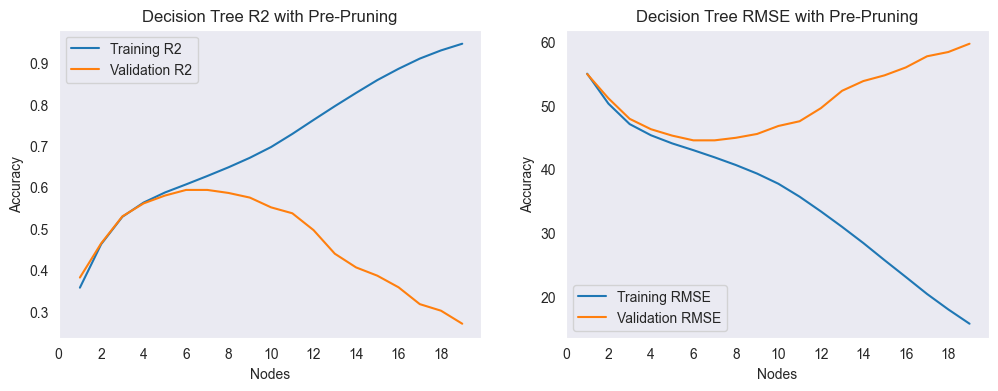

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

plt.subplot(1,2,1)
plt.title("Decision Tree R2 with Pre-Pruning")
plt.plot(node_settings, training_r2, label="Training R2")
plt.plot(node_settings, val_r2, label="Validation R2")
plt.ylabel("Accuracy")
plt.xlabel("Nodes")
plt.xticks(np.arange(0,20,2))
plt.legend()

plt.subplot(1,2,2)
plt.title("Decision Tree RMSE with Pre-Pruning")
plt.plot(node_settings, training_rmse, label="Training RMSE")
plt.plot(node_settings, val_rmse, label="Validation RMSE")
plt.ylabel("Accuracy")
plt.xlabel("Nodes")
plt.xticks(np.arange(0,20,2))
plt.legend()

## Linear Regression Model with L1 and L2 Regularization

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [45]:
linear = LinearRegression()
linear.fit(X_train_std, y_train)

train_pred = linear.predict(X_train_std)
val_pred = linear.predict(X_val_std)

In [46]:
print('Training R^2: {}'.format(linear.score(X_train_std, y_train)))
print('Validation R^2: {}'.format(linear.score(X_val_std, y_val)))

print('Training Root Mean Squared Error: {}'.format(rmse(y_train, train_pred)))
print('Validation Root Mean Squared Error: {}'.format(rmse(y_val, val_pred)))

Training R^2: 0.5785296790472375
Validation R^2: 0.5795146618601092
Training Root Mean Squared Error: 44.508289550328456
Validation Root Mean Squared Error: 45.281568476784194


In [47]:
ridge = Ridge()
ridge.fit(X_train_std, y_train)

train_pred = ridge.predict(X_train_std)
val_pred = ridge.predict(X_val_std)

In [48]:
print('Training R Squared: {}'.format(r2(y_train, train_pred)))
print('Validation R Squared: {}'.format(r2(y_val, val_pred)))

print('Training Root Mean Squared Error: {}'.format(rmse(y_train, train_pred)))
print('Validation Root Mean Squared Error: {}'.format(rmse(y_val, val_pred)))

Training R Squared: 0.5785286395148983
Validation R Squared: 0.5795787259376546
Training Root Mean Squared Error: 44.50834443886452
Validation Root Mean Squared Error: 45.27811885303537


In [49]:
lasso = Lasso()
lasso.fit(X_train_std, y_train)

train_pred = lasso.predict(X_train_std)
val_pred = lasso.predict(X_val_std)

In [50]:
print('Training R Squared: {}'.format(r2(y_train, train_pred)))
print('Validation R Squared: {}'.format(r2(y_val, val_pred)))

print('Training Root Mean Squared Error: {}'.format(rmse(y_train, train_pred)))
print('Validation Root Mean Squared Error: {}'.format(rmse(y_val, val_pred)))

Training R Squared: 0.548721934837669
Validation R Squared: 0.5642980138043874
Training Root Mean Squared Error: 46.055289658452466
Validation Root Mean Squared Error: 46.09361850099187


## Random Forest Regressor

In [51]:
%%time

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=1)
forest.fit(X_train_std, y_train)

CPU times: total: 12.7 s
Wall time: 23.3 s


RandomForestRegressor(random_state=1)

In [52]:
train_pred = forest.predict(X_train_std)
train_pred

array([100.68, 191.84, 153.12, ..., 112.9 ,  16.62, 102.96])

In [53]:
y_train

16281     96
8857     193
8297     147
7198     117
17191    148
        ... 
7088      57
2035     100
10226    108
6791      15
11326     65
Name: RUL, Length: 15473, dtype: int64

In [54]:
val_pred = forest.predict(X_val_std)
val_pred

array([ 17.54, 158.33,  27.93, ..., 101.74, 129.52,  34.58])

In [55]:
y_val

4715      17
11419    119
2518      27
5297      11
16918    233
        ... 
6298     113
17760     35
12918    200
14598    165
5440      24
Name: RUL, Length: 5158, dtype: int64

In [56]:
print('Training R^2: {}'.format(forest.score(X_train_std, y_train)))
print('Validation R^2: {}'.format(forest.score(X_val_std, y_val)))

print('Training Root Mean Squared Error: {}'.format(rmse(y_train, train_pred)))
print('Validation Root Mean Squared Error: {}'.format(rmse(y_val, val_pred)))

Training R^2: 0.9484770594903289
Validation R^2: 0.6369983650046375
Training Root Mean Squared Error: 15.561724637172773
Validation Root Mean Squared Error: 42.07269419954254


In [57]:
# %%time

# training_r2 = []
# val_r2 = []
# training_rmse = []
# val_rmse = []
# estimators = range(1, 100)

# for n in estimators:
#     # Building the model.
#     forest = RandomForestRegressor(n_estimators = n, random_state=1)
#     forest.fit(X_train_std, y_train)

#     train_pred = forest.predict(X_train_std)
#     val_pred = forest.predict(X_val_std)
    
#     # Recording accuracy.
#     training_r2.append(r2(y_train, train_pred))
#     val_r2.append(r2(y_val, val_pred))
#     training_rmse.append(rmse(y_train, train_pred))
#     val_rmse.append(rmse(y_val, val_pred))

In [58]:
# fig, axes = plt.subplots(1, 2, figsize=(12,4))

# plt.subplot(1,2,1)
# plt.title("Random Forest R2")
# plt.plot(estimators, training_r2, label="Training R2")
# plt.plot(estimators, val_r2, label="Validation R2")
# plt.ylabel("Accuracy")
# plt.xlabel("n_estimators")
# plt.xticks(np.arange(0,100,5))
# plt.legend()

# plt.subplot(1,2,2)
# plt.title("Random Forest RMSE")
# plt.plot(estimators, training_rmse, label="Training RMSE")
# plt.plot(estimators, val_rmse, label="Validation RMSE")
# plt.ylabel("Accuracy")
# plt.xlabel("n_estimators")
# plt.xticks(np.arange(0,100,5))
# plt.legend()

# Modelling the Data as a Classification Problem

We've already categorized the data into three risk thresholds:
- High risk: RUL < 50
- Medium risk: 100 < RUL < 50
- Low risk: 100 < RUL

## 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

train = shuffle(train, random_state=0)

# Creating a validation set with 25% of the data. 
# X_train and X_val will include all 21 of the sensors.
# y_train and y_val is just the RUL

X_train, X_val, y_train, y_val = train_test_split(train.iloc[:, 5:26], train.iloc[:, 27], test_size=0.25, random_state=123)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(15473, 21)
(5158, 21)
(15473,)
(5158,)


In [60]:
X_train

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
11686,518.67,642.30,1587.05,1403.75,14.62,21.61,554.27,2388.04,9057.08,1.3,...,521.65,2388.04,8142.45,8.4229,0.03,393,2388,100.0,39.08,23.3833
6284,518.67,642.77,1595.23,1418.64,14.62,21.61,552.92,2388.13,9050.02,1.3,...,521.27,2388.14,8132.91,8.4191,0.03,393,2388,100.0,38.96,23.3069
6873,518.67,642.33,1592.88,1403.69,14.62,21.61,553.49,2388.13,9062.79,1.3,...,521.64,2388.06,8138.57,8.4278,0.03,392,2388,100.0,38.81,23.3700
9755,518.67,641.80,1592.23,1401.26,14.62,21.61,553.56,2388.02,9059.32,1.3,...,521.73,2388.04,8142.33,8.3988,0.03,390,2388,100.0,38.95,23.3749
20220,518.67,642.85,1598.30,1414.73,14.62,21.61,552.53,2388.14,9069.35,1.3,...,521.05,2388.12,8146.83,8.4344,0.03,395,2388,100.0,38.74,23.1894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16213,518.67,642.43,1589.66,1414.22,14.62,21.61,553.74,2388.12,9052.84,1.3,...,521.97,2388.07,8136.73,8.4594,0.03,394,2388,100.0,38.94,23.3194
13034,518.67,643.13,1600.86,1419.06,14.62,21.61,552.79,2388.15,9062.46,1.3,...,521.44,2388.18,8140.40,8.4408,0.03,394,2388,100.0,38.75,23.1515
6444,518.67,641.78,1583.20,1393.37,14.62,21.60,554.53,2388.01,9060.11,1.3,...,522.26,2388.02,8144.21,8.3880,0.03,392,2388,100.0,39.19,23.4803
19531,518.67,643.38,1597.08,1416.45,14.62,21.61,551.99,2388.17,9097.76,1.3,...,520.30,2388.13,8176.27,8.4758,0.03,395,2388,100.0,38.67,23.2573


In [61]:
y_train

11686    1.0
6284     0.0
6873     0.0
9755     0.0
20220    2.0
        ... 
16213    0.0
13034    1.0
6444     0.0
19531    2.0
15593    0.0
Name: risk, Length: 15473, dtype: float32

In [65]:
%%time 

from sklearn import svm

svc = svm.SVC()
svc.fit(X_train, y_train)

CPU times: total: 13.5 s
Wall time: 20.8 s


SVC()

In [66]:
print(svc.predict(X_train))
print(svc.predict(X_val))

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [67]:
print(svc.score(X_train, y_train))
print(svc.score(X_val, y_val))

0.5136043430491825
0.5009693679720822


In [ ]:
%%time

kernels = ['linear', 'rbf', 'poly']

for k in kernels:
    svc = svm.SVC(kernel=k).fit(X_train, y_train)
    print("For a {} model: Training Score: {}".format(k, svc.score(X_train, y_train)))
    print("For a {} model: Validation Score: {}".format(k, svc.score(X_val, y_val)))

In [ ]:
%%time

gammas = [0.1, 1, 10, 100]

for g in gammas:
    svc = svm.SVC(kernel='rbf', gamma=g).fit(X_train, y_train)
    print("For a {} model: Training Score: {}".format(k, svc.score(X_train, y_train)))
    print("For a {} model: Validation Score: {}".format(k, svc.score(X_val, y_val)))

In [ ]:
%%time

penalties = [0.1, 1, 10, 100, 1000]

for p in penalties:
    svc = svm.SVC(kernel='rbf', C=p).fit(X_train, y_train)
    print("For a {} model: Training Score: {}".format(k, svc.score(X_train, y_train)))
    print("For a {} model: Validation Score: {}".format(k, svc.score(X_val, y_val)))

In [ ]:
%%time

degrees = [np.arange(0, 11, 1)]

for d in degrees:
    svc = svm.SVC(kernel='poly', degree=d).fit(X_train, y_train)
    print("For a {} model: Training Score: {}".format(k, svc.score(X_train, y_train)))
    print("For a {} model: Validation Score: {}".format(k, svc.score(X_val, y_val)))

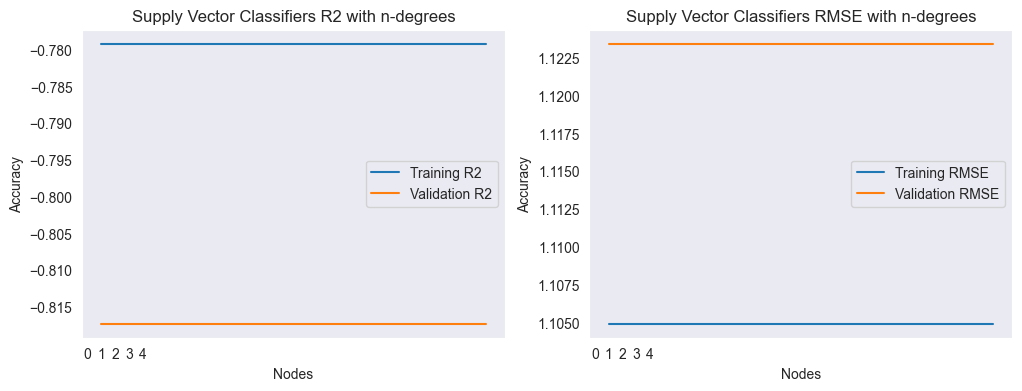

In [304]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

plt.subplot(1,2,1)
plt.title("Supply Vector Classifiers R2 with n-degrees")
plt.plot(degrees, training_r2, label="Training R2")
plt.plot(degrees, val_r2, label="Validation R2")
plt.ylabel("Accuracy")
plt.xlabel("Nodes")
plt.xticks(np.arange(0,5))
plt.legend()

plt.subplot(1,2,2)
plt.title("Supply Vector Classifiers RMSE with n-degrees")
plt.plot(degrees, training_rmse, label="Training RMSE")
plt.plot(degrees, val_rmse, label="Validation RMSE")
plt.ylabel("Accuracy")
plt.xlabel("Nodes")
plt.xticks(np.arange(0,5))
plt.legend()

In [295]:
%%time

linearsv_model = svm.LinearSVC()
linearsv_model.fit(X_train, y_train)

C:\Users\dchit\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


CPU times: total: 5.33 s
Wall time: 10.4 s


C:\Users\dchit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [296]:
print(linearsv_model.predict(X_train))
print(linearsv_model.predict(X_val))

[2. 2. 2. ... 0. 2. 0.]
[2. 2. 2. ... 2. 2. 2.]


In [297]:
print(linearsv_model.score(X_train, y_train))
print(linearsv_model.score(X_val, y_val))

0.3619853939119757
0.3687475765800698


# Neural Networks